 Set up arrays to hold values, and choose plotting options.

In [1]:
from array import array
import math

ichoice = 3

n = 20

# derivative functions:  exact, using forward derivative approx., and using +/- derivative approx
dfunc = array('d')
dfunch = array('d')
dfunchh = array('d')

# basic functions:  f(x), f(x+h), f(x-h), f(x+2h), f(x-2h)
xfunc = array('d')
xfunchp = array('d')
xfunchm = array('d')

# h values
x = array('d')

# difference arrays for (a) forward derivative and (b) +/- derivative 
diff = array('d')
difftwo = array('d')

xval = 1.0

if ichoice == 1:
    print ("Using forward derivative ... ")
elif ichoice == 2:
    print ("Using centered derivative ... ")
else:
    print ("Using both methods ... ")

Using both methods ... 


Loop over h values:  calculate derivative functions exactly, and using approximations.

In [2]:
for i in range(0,n):

    hpower=i-n;
    x.append(math.pow(10.0,int(hpower)));
    
    xfunc.append(xval*xval*xval);
    xfunchp.append((xval+x[i])*(xval+x[i])*(xval+x[i]));
    xfunchm.append((xval-x[i])*(xval-x[i])*(xval-x[i]));

    dfunc.append(3.0e+00*xval*xval);
    
    if ichoice == 1:
        dfunch.append((xfunchp[i]-xfunc[i])/(x[i]));
        diff.append(abs(dfunc[i]-dfunch[i]));
    elif ichoice == 2:
        dfunch.append((xfunchp[i]-xfunchm[i])/(2.0e+00*x[i]));
        diff.append(abs(dfunc[i]-dfunch[i]));
    else:
        dfunch.append((xfunchp[i]-xfunc[i])/(x[i]));
        dfunchh.append((xfunchp[i]-xfunchm[i])/(2.0e+00*x[i]));
        diff.append(abs(dfunc[i]-dfunch[i]));
        difftwo.append(abs(dfunc[i]-dfunchh[i]));

In [ ]:
Plot the results!

Welcome to JupyROOT 6.16/00


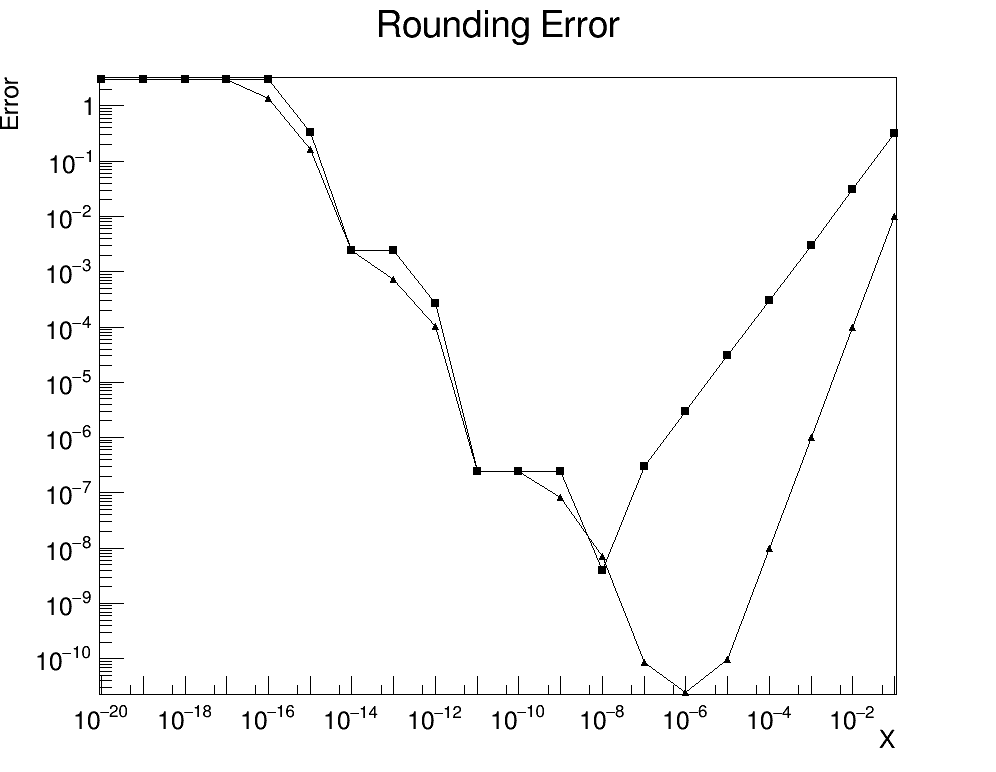

In [3]:
from ROOT import TCanvas
from ROOT import TGraph

c1 = TCanvas("c1","c1",0,0,1000,800)
gr = TGraph(n,x,diff)
gr.SetMarkerStyle(21)
gr.SetTitle("Rounding Error")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Error")

gr2 = TGraph(n,x,difftwo)
gr2.SetMarkerStyle(22)
gr2.SetTitle("Rounding Error")
gr2.GetXaxis().SetTitle("X")
gr2.GetYaxis().SetTitle("Error")

gr2.Draw("APL")
gr.Draw("PL")

c1.SetLogx()
c1.SetLogy()
c1.Draw()